In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
junct4 = pd.read_csv("Traffic_Junc/Junc4.csv")
junct4.head()

,DateTime,Junction,Vehicles,year
0,2017-01-01 00:00:00,4,3,2017
1,2017-01-01 01:00:00,4,1,2017
2,2017-01-01 02:00:00,4,4,2017
3,2017-01-01 03:00:00,4,4,2017
4,2017-01-01 04:00:00,4,2,2017


In [3]:
junct4['DateTime'] = pd.to_datetime(junct4['DateTime'])
junct4.set_index('DateTime',inplace=True)
junct4.head()

,Junction,Vehicles,year
DateTime,,,
2017-01-01 00:00:00,4,3,2017
2017-01-01 01:00:00,4,1,2017
2017-01-01 02:00:00,4,4,2017
2017-01-01 03:00:00,4,4,2017
2017-01-01 04:00:00,4,2,2017


In [4]:
junct4.shape

(4344, 3)

<AxesSubplot:xlabel='DateTime'>

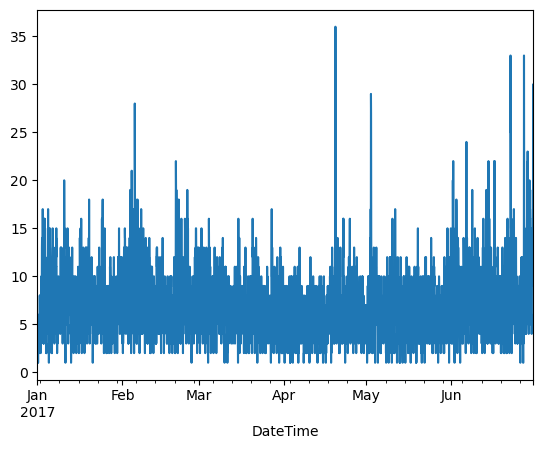

In [5]:
junct4["Vehicles"].plot()

In [29]:
junct4.describe()

,Junction,Vehicles,year
count,4344.0,4344.000000,4344.0
mean,4.0,7.251611,2017.0
std,0.0,3.521455,0.0
min,4.0,1.000000,2017.0
25%,4.0,5.000000,2017.0
50%,4.0,7.000000,2017.0
75%,4.0,9.000000,2017.0
max,4.0,36.000000,2017.0


In [6]:
# Resampling the data as daily average

junct4_daily = junct4.Vehicles.resample('D').mean()
junct4_daily.head()

DateTime
2017-01-01    3.875000
2017-01-02    7.583333
2017-01-03    9.541667
2017-01-04    8.000000
2017-01-05    9.750000
Freq: D, Name: Vehicles, dtype: float64

<AxesSubplot:xlabel='DateTime'>

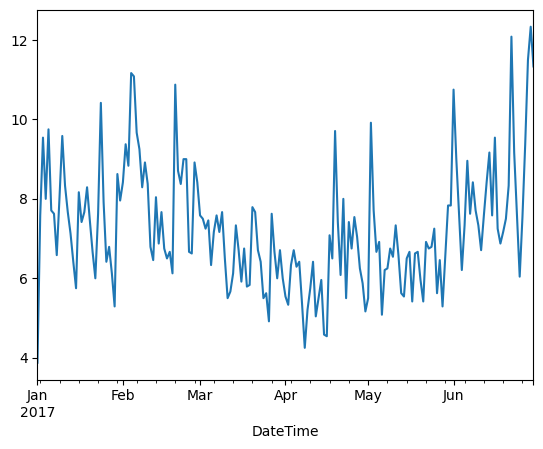

In [7]:
junct4_daily.plot()

In [28]:
junct4.head(50)

,Junction,Vehicles,year
DateTime,,,
2017-01-01 00:00:00,4,3,2017
2017-01-01 01:00:00,4,1,2017
2017-01-01 02:00:00,4,4,2017
2017-01-01 03:00:00,4,4,2017
2017-01-01 04:00:00,4,2,2017
2017-01-01 05:00:00,4,1,2017
2017-01-01 06:00:00,4,1,2017
2017-01-01 07:00:00,4,4,2017
2017-01-01 08:00:00,4,4,2017


In [9]:
X = junct4[['year', 'Junction']]
y = junct4['Vehicles']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42) 

# Fitting in our models 
# ---
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  

# Don't worry about the model parameters, we will learn about 
# them in a separate workshop
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 3.692913126782593
KNN RMSE: 3.707681464269928
Decision Tree RMSE: 3.665238190159285


In [10]:
# First we check for modeling with standardisation
# ---

# We select our features
X = junct4[['year', 'Junction']]
y = junct4['Vehicles']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 3.692913126782593
KNN RMSE: 3.707681464269928
Decision Tree RMSE: 3.665238190159285


In [11]:
# First, we then perform modeling with both standardisation and normalisation.
# We will use this as as our base for our solution, then perform feature engineering 
# by filter methods.
# ---

# We select our features
X = junct4[['year', 'Junction']]
y = junct4['Vehicles']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 3.692913126782593
KNN RMSE: 3.707681464269928
Decision Tree RMSE: 3.665238190159285


<AxesSubplot:>

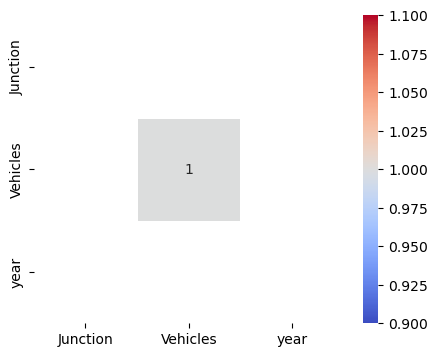

In [12]:
# Then appply filter methods by plotting a correlation matrix
# ---
#
junct4_corr = junct4.corr()
plt.figure(figsize=(5,4))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(junct4_corr, annot=True, linewidth=0.5, cmap='coolwarm')

In [20]:
# Then perform our modeling, comparing the resulting accuracy to the previous base solution.
# ---
# We select our features
X = junct4[['year', 'Junction']]
y = junct4['Vehicles']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation 
norm = MinMaxScaler()
norm.fit(X_train)

X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 3.692913126782593
KNN RMSE: 3.707681464269928
Decision Tree RMSE: 3.665238190159285


In [27]:
current_time = datetime.now()
future_time = current_time + timedelta(hours=1)
future_time_str = future_time.strftime('%Y-%m-%d %H:%M:%S')

predicted_traffic = svm_regressor.predict(X_test[-1].reshape(1, -1))
# predicted_traffic = norm.inverse_transform(predicted_traffic.reshape(1, -1))

print('Current Time:', current_time)
print('Future Time:', future_time_str)
print('Predicted Traffic at Future Time:', predicted_traffic[0])

Current Time: 2023-07-05 01:44:09.714242
Future Time: 2023-07-05 02:44:09
Predicted Traffic at Future Time: 6.9
